           movie_name                                             review  \
0  Echoes of Tomorrow  An amazing film with a powerful message. Highl...   
1     Shattered Truth  Terrible plot and bad acting. A complete waste...   
2         Rising Dawn  Absolutely loved the storyline and the charact...   
3       Fading Lights  It was boring and too slow. I nearly fell asleep.   
4   The Last Symphony  A masterpiece. One of the best movies I’ve eve...   

  sentiment  polarity  
0  Positive  0.366667  
1  Negative -0.360000  
2  Positive  0.700000  
3  Negative -0.400000  
4  Positive  1.000000  

🎥 Top 5 Most Polarized Movies:
movie_name
Ashes of Time         0.0
Burning Silence       0.0
Chasing Horizons      0.0
Dreamcatcher          0.0
Echoes of Tomorrow    0.0
dtype: float64


<ipython-input-12-f13e189ff244>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(polarization_score)
<ipython-input-12-f13e189ff244>:46: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-f13e189ff244>:47: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.savefig("swarm_plot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


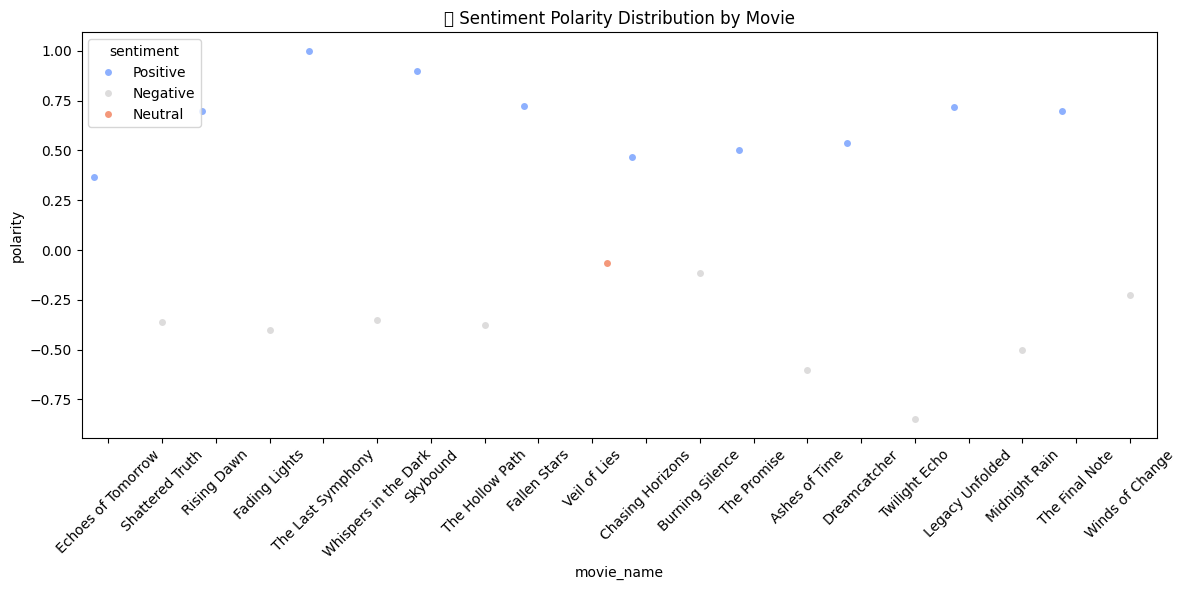

In [12]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
df = pd.read_csv("/content/sample_movie_reviews_with_titles.csv")  # Ensure this has 'movie_name' and 'review' columns

# Step 2: Sentiment analysis using TextBlob
def analyze_sentiment(review):
    blob = TextBlob(str(review))
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        sentiment = 'Positive'
    elif polarity < -0.1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return pd.Series([polarity, sentiment])

# Apply the sentiment analysis
df[['polarity', 'sentiment']] = df['review'].apply(analyze_sentiment)

# Show a few rows
print(df.head())

# Step 3: Rank Top 5 Most Polarized Movies
def polarization_score(group):
    return group['polarity'].max() - group['polarity'].min()

polarized = (
    df.groupby('movie_name', group_keys=False)
    .apply(polarization_score)
    .sort_values(ascending=False)
    .head(5)
)

print("\n🎥 Top 5 Most Polarized Movies:")
print(polarized)

# Step 4: Swarm Plot for Sentiment Polarity Distribution
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='movie_name', y='polarity', hue='sentiment', palette='coolwarm', dodge=True)
plt.title("🎬 Sentiment Polarity Distribution by Movie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("swarm_plot.png")
plt.show()
